In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
class_alt = pd.read_csv('/kaggle/input/eau-dataset/données/classe_alteration_seq_eau.csv')
list_faune = pd.read_csv('/kaggle/input/eau-dataset/données/liste_faunistique_floristique.csv')
physchim = pd.read_csv('/kaggle/input/eau-dataset/données/physicochimie.csv')
station = pd.read_csv('/kaggle/input/eau-dataset/données/station.csv')
taxon = pd.read_csv('/kaggle/input/eau-dataset/données/taxon.csv')
taxon_denom = pd.read_csv('/kaggle/input/eau-dataset/données/taxon_denombre.csv')

In [6]:
class_alt

,id,parametre_id,nom,alteration_id,nom.1,valeur,libelle,borne_inf_incluse,borne_sup_incluse,borne_inf,borne_sup,unite_mesure_code,libelle.1,norme
0,10231,1301,Température de l'Eau,0,TEMP,1,Bleu,t,f,\N,24,27,degré Celsius,DCE
1,10232,1301,Température de l'Eau,0,TEMP,2,Vert,t,f,24,25.5,27,degré Celsius,DCE
2,10233,1301,Température de l'Eau,0,TEMP,3,Jaune,t,f,25.5,27,27,degré Celsius,DCE
3,10234,1301,Température de l'Eau,0,TEMP,4,Orange,t,f,27,28,27,degré Celsius,DCE
4,10235,1301,Température de l'Eau,0,TEMP,5,Rouge,t,f,28,\N,27,degré Celsius,DCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,10659,1383,Zinc,16,MPMI,2,Vert,t,f,1.3999999999999999,14,133,microgramme par litre,SEQ
1097,10660,1383,Zinc,16,MPMI,3,Jaune,t,f,14,140,133,microgramme par litre,SEQ
1098,10661,1383,Zinc,16,MPMI,4,Orange,t,f,140,330,133,microgramme par litre,SEQ
1099,10662,1383,Zinc,16,MPMI,5,Rouge,t,f,330,\N,133,microgramme par litre,SEQ


In [7]:
list_faune

,id,date_year,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur
0,398943,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN
1,398943,2013,2013-07-23 00:00:00.000,3545195,"Roches, dalles",Vitesse < 5 cm/s,NaN
2,398944,2007,2007-08-29 00:00:00.000,3525909,NaN,NaN,NaN
3,398944,2007,2007-08-29 00:00:00.000,3525910,NaN,NaN,NaN
4,398944,2009,2009-09-28 00:00:00.000,3527276,NaN,NaN,NaN
...,...,...,...,...,...,...,...
55687,421014,2013,2013-06-27 00:00:00.000,3627210,NaN,NaN,NaN
55688,421014,2010,2010-06-09 00:00:00.000,3637746,NaN,NaN,NaN
55689,421014,2012,2012-06-21 00:00:00.000,3655503,NaN,NaN,NaN
55690,421014,2010,2010-06-09 00:00:00.000,3664704,NaN,NaN,NaN


In [8]:
physchim

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
0,398944,2007,10.825000,1301,Température de l'Eau,27,degré Celsius
1,398944,2008,10.300000,1301,Température de l'Eau,27,degré Celsius
2,398944,2009,11.208333,1301,Température de l'Eau,27,degré Celsius
3,398944,2010,10.930000,1301,Température de l'Eau,27,degré Celsius
4,398944,2011,10.433333,1301,Température de l'Eau,27,degré Celsius
...,...,...,...,...,...,...,...
187437,421014,2008,11.250000,1375,Sodium,162,milligramme par litre
187438,421014,2009,21.150000,1375,Sodium,162,milligramme par litre
187439,421014,2010,5.950000,1375,Sodium,162,milligramme par litre
187440,421014,2011,6.550000,1375,Sodium,162,milligramme par litre


In [9]:
station

,id,date_year,nom_masse_eau,her,st_x,st_y
0,398943,2007,SAMBRE,20,751467.817242,7.004902e+06
1,398943,2008,SAMBRE,20,751467.817242,7.004902e+06
2,398943,2010,SAMBRE,20,751467.817242,7.004902e+06
3,398943,2013,SAMBRE,20,751467.817242,7.004902e+06
4,398944,2007,HELPE MAJEURE,22,784221.677267,7.002720e+06
...,...,...,...,...,...,...
12056,421014,2009,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12057,421014,2010,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12058,421014,2011,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12059,421014,2012,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06


In [10]:
taxon

,id,nom_latin,taxon_parent_id
0,327,Beraeidae,20545.0
1,212,Hydropsyche,211.0
2,1072,Dendrocoelum,1071.0
3,1064,Polycelis,1061.0
4,1044,Sphaerium,1042.0
...,...,...,...
3395,29918,Bromus,23597.0
3396,1234,Drepanocladus,1218.0
3397,1594,Nymphoides peltata,1593.0
3398,10211,Drepanocladus aduncus,1234.0


In [42]:
taxon_denom

,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
0,3551360,322,1.0,Nombre exact d'individus,1
1,3551268,837,8.0,Nombre exact d'individus,1
2,3663043,2080,60.0,Longueur Minimale totale exprimée en mm,2
3,3551258,906,120.0,Nombre exact d'individus,1
4,3671035,2012,1.0,Poids individuel exprimé en g,3
...,...,...,...,...,...
1569195,3666127,2088,14.0,Poids total de l'ensemble des individus appart...,5
1569196,3626819,69,2.0,Nombre exact d'individus,1
1569197,3626765,183,3.0,Nombre exact d'individus,1
1569198,3671544,2197,18.0,Poids individuel exprimé en g,3


In [12]:
criteres_tailles = taxon_denom[taxon_denom["critere_taxon"].str.contains(r"(?i)longueur")] \
                   ["critere_taxon_id"] \
                   .unique() \
                   .tolist()

criteres_tailles

[2, 4, 6, 11, 13, 15]

Par taxons, par critère, pour une liste ff : une unique valeur

In [14]:
length_taxons = taxon_denom[taxon_denom["critere_taxon_id"].isin(criteres_tailles)]
# print(length_taxons.sort_values("taxon_id"))
length_taxons\
    .drop(columns=["critere_taxon"])\
    .groupby(["taxon_id", "critere_taxon_id", "liste_ff_id"])\
    .count()\
    ["valeur"]\
    .unique()


array([1])

In [15]:
length_taxons

,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
2,3663043,2080,60.0,Longueur Minimale totale exprimée en mm,2
9,3671035,2080,32.0,Longueur Individuelle totale exprimée en mm,4
32,3671035,2221,40.0,Longueur Individuelle totale exprimée en mm,4
50,3663043,2221,53.0,Longueur Individuelle totale exprimée en mm,4
58,3671035,2080,87.0,Longueur Maximale totale exprimée en mm,6
...,...,...,...,...,...
1569172,3676992,2071,86.0,Longueur Maximale totale exprimée en mm,6
1569183,3647224,2131,25.0,Longueur Minimale totale exprimée en mm,2
1569185,3666127,2104,71.0,Longueur Individuelle totale exprimée en mm,4
1569189,3676992,2096,258.0,Longueur Individuelle totale exprimée en mm,4


On garde que les critères de chaque taxons pour lesquelles on a assez de valeurs pour étudier l'évolution

In [90]:
a = length_taxons\
    .drop(columns=["critere_taxon"])\
    .groupby(["taxon_id", "critere_taxon_id"])\
    ["liste_ff_id"]\
    .count()

to_keep = a[a > 2500].sort_values(ascending=False)
to_keep

taxon_id  critere_taxon_id
2071      4                   4355
31041     4                   3190
2113      4                   3119
2038      4                   3086
2080      4                   2868
2125      4                   2699
Name: liste_ff_id, dtype: int64

In [180]:
stn_lf = station.merge(list_faune, left_on='id', right_on='id')
stn_taxon = stn_lf.merge(taxon_denom, left_on='liste_faunistique_floristique', right_on='liste_ff_id')
stn_taxon

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
0,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,7843,4.0,Nombre exact d'individus,1
1,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,7881,66.0,Nombre exact d'individus,1
2,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,9034,1.0,Nombre exact d'individus,1
3,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,8992,1.0,Nombre exact d'individus,1
4,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,8719,1.0,Nombre exact d'individus,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10864784,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2080,678.0,Poids total de l'ensemble des individus appart...,5
10864785,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2165,8.0,Nombre exact d'individus,1
10864786,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2080,63.0,Nombre exact d'individus,1
10864787,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2221,31.0,Poids total de l'ensemble des individus appart...,5


In [263]:
stn_taxon_taille = stn_taxon[(stn_taxon['taxon_id'] == 2080) & (stn_taxon['critere_taxon_id'] == 4)]

In [266]:
test = stn_taxon_taille.groupby(['id', 'taxon_id']).nunique().sort_values('liste_faunistique_floristique', ascending=False).head(5)\
.groupby('id').count().index.tolist()


In [240]:
taxon_to_keep = stn_taxon_taille.groupby(['id', 'taxon_id']).count().groupby('id').head(5).groupby('taxon_id').count()\
.sort_values('valeur', ascending = False).head(5).index.tolist()
taxon_to_keep

[2071, 2038, 2080, 871, 2050]

In [241]:
stn_to_keep = stn_taxon_taille[stn_taxon_taille['taxon_id'].isin(taxon_to_keep)].groupby('id').count().sort_values('valeur', ascending=False).head(5)\
.index.tolist()
stn_to_keep

[399225, 404039, 402817, 404651, 413256]

In [242]:
stn_taxon_red = stn_taxon_taille[stn_taxon_taille['id'].isin(test) & stn_taxon_taille['taxon_id'].isin(taxon_to_keep)]
stn_taxon_red

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
455368,399225,2007,La Boutonne de sa source au confluent de la Belle,9,451708.46875,6565540.5,2012,2012-09-07 00:00:00.000,3644456,NaN,NaN,NaN,3644456,2080,61.0,Longueur Individuelle totale exprimée en mm,4
455372,399225,2007,La Boutonne de sa source au confluent de la Belle,9,451708.46875,6565540.5,2012,2012-09-07 00:00:00.000,3644456,NaN,NaN,NaN,3644456,2071,84.0,Longueur Individuelle totale exprimée en mm,4
455386,399225,2007,La Boutonne de sa source au confluent de la Belle,9,451708.46875,6565540.5,2012,2012-09-07 00:00:00.000,3644456,NaN,NaN,NaN,3644456,871,68.0,Longueur Individuelle totale exprimée en mm,4
455422,399225,2007,La Boutonne de sa source au confluent de la Belle,9,451708.46875,6565540.5,2012,2012-09-07 00:00:00.000,3644456,NaN,NaN,NaN,3644456,2038,249.0,Longueur Individuelle totale exprimée en mm,4
455428,399225,2008,La Boutonne de sa source au confluent de la Belle,9,451708.46875,6565540.5,2012,2012-09-07 00:00:00.000,3644456,NaN,NaN,NaN,3644456,2080,61.0,Longueur Individuelle totale exprimée en mm,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158611,403587,2011,LA SEVRE NIORTAISE ET SES AFFLUENTS DEPUIS LA ...,9,462403.00000,6587740.0,2012,2012-09-06 00:00:00.000,3679642,NaN,NaN,NaN,3679642,2038,379.0,Longueur Individuelle totale exprimée en mm,4
5158636,403587,2012,LA SEVRE NIORTAISE ET SES AFFLUENTS DEPUIS LA ...,9,462403.00000,6587740.0,2012,2012-09-06 00:00:00.000,3679642,NaN,NaN,NaN,3679642,2071,77.0,Longueur Individuelle totale exprimée en mm,4
5158652,403587,2012,LA SEVRE NIORTAISE ET SES AFFLUENTS DEPUIS LA ...,9,462403.00000,6587740.0,2012,2012-09-06 00:00:00.000,3679642,NaN,NaN,NaN,3679642,2038,379.0,Longueur Individuelle totale exprimée en mm,4
5158677,403587,2013,LA SEVRE NIORTAISE ET SES AFFLUENTS DEPUIS LA ...,9,462403.00000,6587740.0,2012,2012-09-06 00:00:00.000,3679642,NaN,NaN,NaN,3679642,2071,77.0,Longueur Individuelle totale exprimée en mm,4


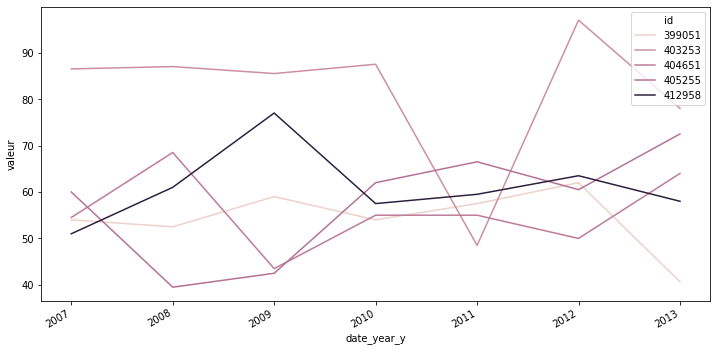

In [270]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data=stn_taxon_taille[(stn_taxon_taille['taxon_id'] == 2080) & (stn_taxon_taille['id'].isin(test))], x="date_year_y", y="valeur", hue="id", ci=None, ax=ax)
fig.autofmt_xdate()
plt.show()